In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/displacement_data.csv')
dfx= data[["x","y","u_x"]]
dfy= data[["x","y","u_y"]]



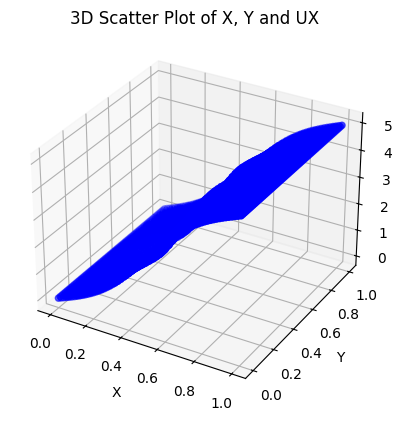

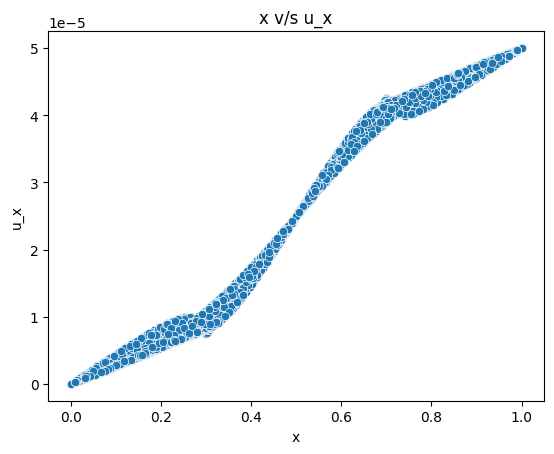

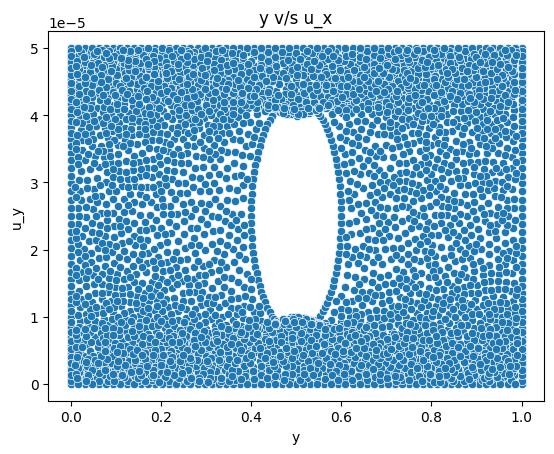

In [108]:
x1 = dfx[['x', 'y']]
y1 = dfx['u_x']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfx['x'], dfx['y'], dfx['u_x'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_X')
plt.title("3D Scatter Plot of X, Y and UX")
plt.show()

sns.scatterplot(x="x",y="u_x",data=dfx)
plt.title("x v/s u_x")
plt.xlabel("x")
plt.ylabel("u_x")
plt.show()

sns.scatterplot(x="y",y="u_x",data=dfx)
plt.title("y v/s u_x")
plt.xlabel("y")
plt.ylabel("u_y")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


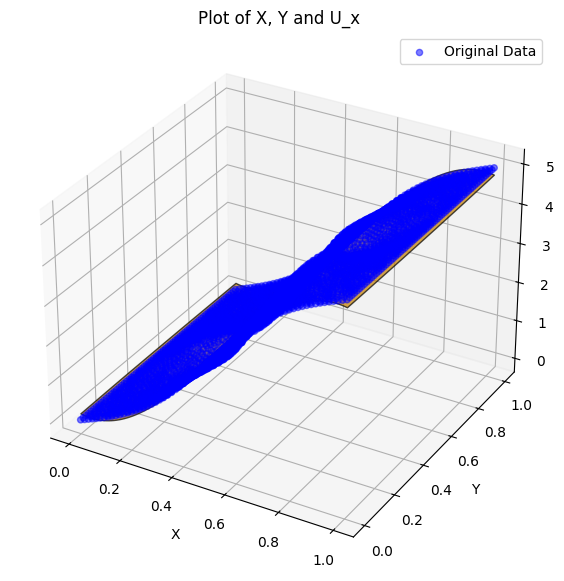

Mean Squared Error: 1.7482975900638545e-12


In [109]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x1)
model_x = LinearRegression()
model_x.fit(X_poly,y1)
x_range = np.linspace(dfx['x'].min(), dfx['x'].max(), 100)
y_range = np.linspace(dfx['y'].min(), dfx['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
X_grid_poly = poly.transform(np.c_[X_grid.ravel(), Y_grid.ravel()])
Z_grid = model_x.predict(X_grid_poly).reshape(X_grid.shape)

# Plot the original data and the polynomial plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scatter data
ax.scatter(dfx['x'], dfx['y'], dfx['u_x'], color='blue', alpha=0.5, label="Original Data")

# Plot the polynomial plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='orange', alpha=0.7, rstride=100, cstride=100, edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_x')
ax.set_title('Plot of X, Y and U_x')

plt.legend()
plt.show()
u_x_pred = model_x.predict(X_poly)
print("Mean Squared Error:", mean_squared_error(y1, u_x_pred))

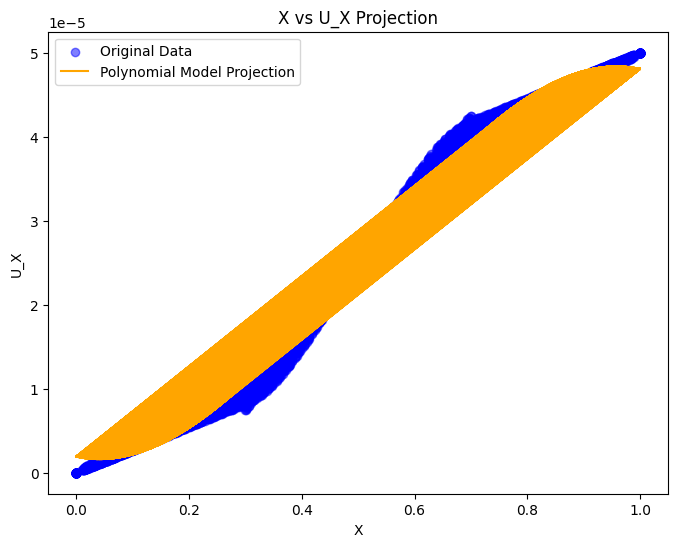

In [110]:
# Define a fixed value for y (e.g., the mean of y)
y_fixed = np.full_like(dfx['x'], dfx['y'].mean())

# Create a DataFrame with varying x and fixed y
X_x_projection = pd.DataFrame({'x': dfx['x'], 'y': y_fixed})
X_x_projection_poly = poly.transform(X_x_projection)  # Transform for polynomial terms

# Predict u_y along x-axis using the fixed y value
u_y_x_projection = model_x.predict(X_x_projection_poly)

# Plot the original data projection along the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(dfx['x'], dfx['u_x'], color='blue', alpha=0.5, label='Original Data')
plt.plot(dfx['x'], u_y_x_projection, color='orange', label='Polynomial Model Projection')
plt.xlabel('X')
plt.ylabel('U_X')
plt.title('X vs U_X Projection')
plt.legend()
plt.show()

In [111]:
# Extract terms and construct the polynomial equation string
coefficients_x = model_x.coef_
print(coefficients_x)
intercept_x = model_x.intercept_
print(intercept_x)
terms = poly.get_feature_names_out(['x', 'y'])
equation = f"{intercept_x} "  # Start with the intercept

for coef, term in zip(coefficients_x[1:], terms[1:]):  # Skip the first term as it corresponds to the intercept
    equation += f"+ ({coef}) * {term} "

print("Polynomial Regression Equation for u_x:")
print(equation)

[ 0.00000000e+00 -1.36976843e-05  9.05184921e-07  1.81059087e-04
 -1.76706593e-06 -1.06112558e-06 -1.20822755e-04  3.24344625e-07
  1.39513847e-06  2.85043487e-07]
1.6921081872176515e-06
Polynomial Regression Equation for u_x:
1.6921081872176515e-06 + (-1.369768431049871e-05) * x + (9.051849214103604e-07) * y + (0.00018105908678491336) * x^2 + (-1.7670659335423594e-06) * x y + (-1.061125580960092e-06) * y^2 + (-0.00012082275487898261) * x^3 + (3.243446245385676e-07) * x^2 y + (1.3951384667928194e-06) * x y^2 + (2.850434872657027e-07) * y^3 


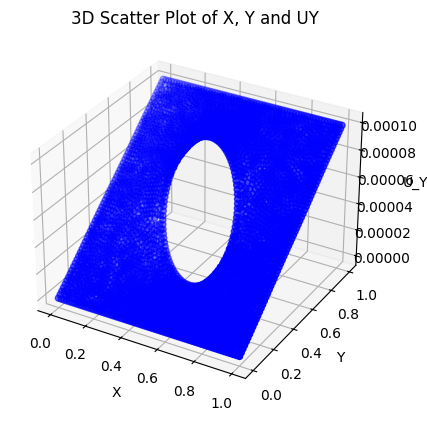

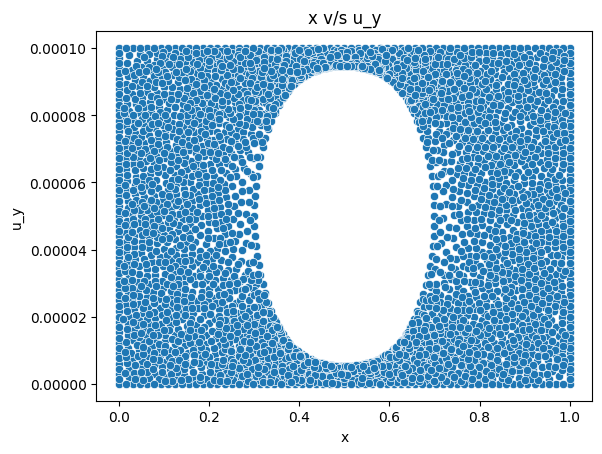

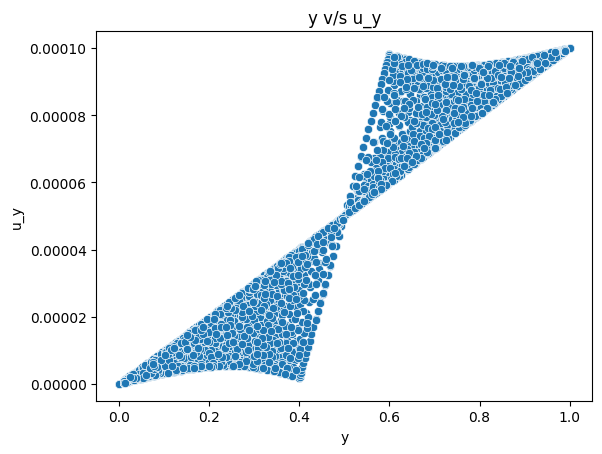

In [112]:
x2 = dfy[['x', 'y']]
y2 = dfy['u_y']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfy['x'], dfy['y'], dfy['u_y'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_Y')
plt.title("3D Scatter Plot of X, Y and UY")
plt.show()

sns.scatterplot(x="x",y="u_y",data=dfy)
plt.title("x v/s u_y")
plt.xlabel("x")
plt.ylabel("u_y")
plt.show()

sns.scatterplot(x="y",y="u_y",data=dfy)
plt.title("y v/s u_y")
plt.xlabel("y")
plt.ylabel("u_y")
plt.show()

In [113]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x2)

# Fit a linear regression model on the transformed features
model_y = LinearRegression()
model_y.fit(X_poly, y2)

# Predict u_y values for original X
u_y_pred = model_y.predict(X_poly)

# Print model coefficients
print("Polynomial Coefficients:", model_y.coef_)
print("Intercept:", model_y.intercept_)
print("Mean Squared Error:", mean_squared_error(y2, u_y_pred))
coefficients_y = model_y.coef_
intercept_y = model_y.intercept_
terms = poly.get_feature_names_out(['x', 'y'])
equation = f"{intercept_y} "  # Start with the intercept

for coef, term in zip(coefficients_y[1:], terms[1:]):  # Skip the first term as it corresponds to the intercept
    equation += f"+ ({coef}) * {term} "

print("Polynomial Regression Equation for u_y:")
print(equation)

Polynomial Coefficients: [ 0.00000000e+00 -7.40726904e-05 -5.44821170e-05  7.39216794e-05
  1.49412013e-04  3.64422860e-04  6.16373692e-07 -1.50637766e-04
  1.25948165e-06 -2.43284148e-04]
Intercept: 1.6404027688499443e-05
Mean Squared Error: 5.310233363056812e-11
Polynomial Regression Equation for u_y:
1.6404027688499443e-05 + (-7.407269035087905e-05) * x + (-5.448211700885749e-05) * y + (7.392167941663801e-05) * x^2 + (0.00014941201251459884) * x y + (0.0003644228602089265) * y^2 + (6.163736915856887e-07) * x^3 + (-0.00015063776550802428) * x^2 y + (1.2594816543668586e-06) * x y^2 + (-0.000243284147577301) * y^3 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


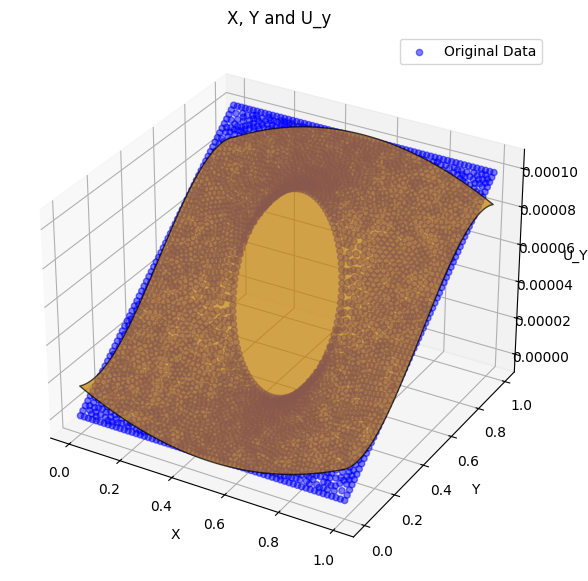

In [114]:
x_range = np.linspace(dfy['x'].min(), dfy['x'].max(), 100)
y_range = np.linspace(dfy['y'].min(), dfy['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
X_grid_poly = poly.transform(np.c_[X_grid.ravel(), Y_grid.ravel()])
Z_grid = model_y.predict(X_grid_poly).reshape(X_grid.shape)

# Plot the original data and the polynomial plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scatter data
ax.scatter(dfy['x'], dfy['y'], dfy['u_y'], color='blue', alpha=0.5, label="Original Data")

# Plot the polynomial plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='orange', alpha=0.7, rstride=100, cstride=100, edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_Y')
ax.set_title('X, Y and U_y')


plt.legend()
plt.show()

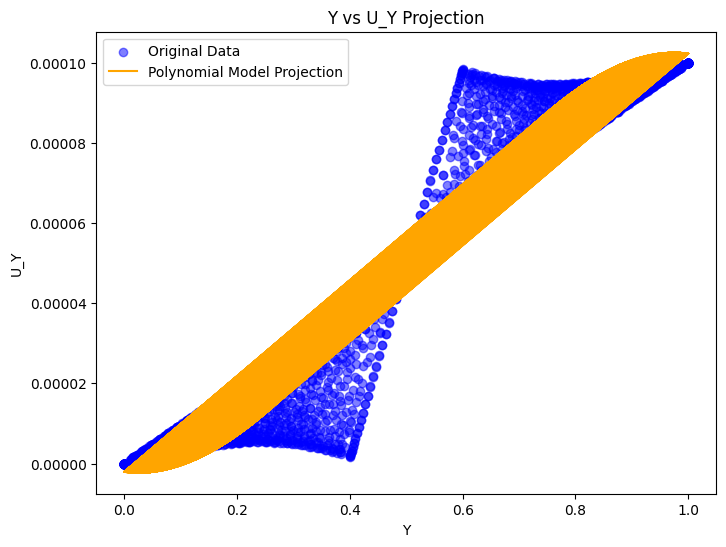

In [115]:
x_fixed = np.full_like(dfy['y'], dfy['x'].mean())

# Create a DataFrame with fixed x and varying y
X_y_projection = pd.DataFrame({'x': x_fixed, 'y': dfy['y']})
X_y_projection_poly = poly.transform(X_y_projection)  # Transform for polynomial terms

# Predict u_y along y-axis using the fixed x value
u_y_y_projection = model_y.predict(X_y_projection_poly)

# Plot the original data projection along the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(dfy['y'], dfy['u_y'], color='blue', alpha=0.5, label='Original Data')
plt.plot(dfy['y'], u_y_y_projection, color='orange', label='Polynomial Model Projection')
plt.xlabel('Y')
plt.ylabel('U_Y')
plt.title('Y vs U_Y Projection')
plt.legend()
plt.show()

In [116]:
from sympy import symbols, diff
x,y = symbols('x y')
ux=(
    intercept_x+
    coefficients_x[1]*x+
    coefficients_x[2]*y+
    coefficients_x[3]*x**2+
    coefficients_x[4]*x*y+
    coefficients_x[5]*y**2+
    coefficients_x[6]*x**3+
    coefficients_x[7]*x**2*y+
    coefficients_x[8]*x*y**2+
    coefficients_x[9]*y**3
)
print(ux)

-0.000120822754878983*x**3 + 3.24344624538568e-7*x**2*y + 0.000181059086784913*x**2 + 1.39513846679282e-6*x*y**2 - 1.76706593354236e-6*x*y - 1.36976843104987e-5*x + 2.85043487265703e-7*y**3 - 1.06112558096009e-6*y**2 + 9.0518492141036e-7*y + 1.69210818721765e-6


In [117]:
uy=(
    intercept_y+
    coefficients_y[1]*x+
    coefficients_y[2]*y+
    coefficients_y[3]*x**2+
    coefficients_y[4]*x*y+
    coefficients_y[5]*y**2+
    coefficients_y[6]*x**3+
    coefficients_y[7]*x**2*y+
    coefficients_y[8]*x*y**2+
    coefficients_y[9]*y**3
)
print(uy)

6.16373691585689e-7*x**3 - 0.000150637765508024*x**2*y + 7.3921679416638e-5*x**2 + 1.25948165436686e-6*x*y**2 + 0.000149412012514599*x*y - 7.4072690350879e-5*x - 0.000243284147577301*y**3 + 0.000364422860208926*y**2 - 5.44821170088575e-5*y + 1.64040276884994e-5


In [118]:
exx_1=diff(ux,x)
eyy_1=diff(uy,y)
exx = sum(term for term in exx_1.as_ordered_terms() if term.has(x, y))
eyy = sum(term for term in eyy_1.as_ordered_terms() if term.has(x, y))
print(exx)
print(eyy)

-0.000362468264636948*x**2 + 6.48689249077135e-7*x*y + 0.000362118173569827*x + 1.39513846679282e-6*y**2 - 1.76706593354236e-6*y
-0.000150637765508024*x**2 + 2.51896330873372e-6*x*y + 0.000149412012514599*x - 0.000729852442731903*y**2 + 0.000728845720417853*y


In [119]:
s_xx_lambda= sum([exx,eyy])
s_yy_lambda= s_xx_lambda
s_xx_mew= 2*exx
s_yy_mew= 2*eyy

print(s_xx_lambda)
print(s_yy_lambda)
print(s_xx_mew)
print(s_yy_mew)

-0.000513106030144972*x**2 + 3.16765255781085e-6*x*y + 0.000511530186084426*x - 0.00072845730426511*y**2 + 0.000727078654484311*y
-0.000513106030144972*x**2 + 3.16765255781085e-6*x*y + 0.000511530186084426*x - 0.00072845730426511*y**2 + 0.000727078654484311*y
-0.000724936529273896*x**2 + 1.29737849815427e-6*x*y + 0.000724236347139653*x + 2.79027693358564e-6*y**2 - 3.53413186708472e-6*y
-0.000301275531016049*x**2 + 5.03792661746743e-6*x*y + 0.000298824025029198*x - 0.00145970488546381*y**2 + 0.00145769144083571*y


In [120]:
R_x_1=s_xx_lambda.subs(x,1)
R_x_2=s_xx_mew.subs(x,1)
print(R_x_1,R_x_2)

-0.00072845730426511*y**2 + 0.000730246307042121*y - 1.57584406054658e-6 2.79027693358564e-6*y**2 - 2.23675336893045e-6*y - 7.00182134242221e-7


In [121]:
from sympy import integrate
R_x_lambda=integrate(R_x_1, (y, 0, 1))
R_x_mew=integrate(R_x_2, (y, 0, 1))
print(R_x_lambda)
print(R_x_mew)

0.000120728208038811
-8.88466507512232e-7


In [122]:
R_y_1=s_yy_lambda.subs(y,1)
R_y_2=s_yy_mew.subs(y,1)
R_y_lambda=integrate(R_y_1, (x, 0, 1))
R_y_mew=integrate(R_y_2, (x, 0, 1))
print(R_y_lambda)
print(R_y_mew)


8.49349261586612e-5
4.94923541898829e-5


In [123]:
Reaction = pd.read_csv('/content/reaction_data.csv')
Reaction.head()

,Reaction,Value
0,R3,-2.131946e+07
1,R4,2.131946e+07
2,R1,-2.537716e+07
3,R2,2.537716e+07


In [124]:
R_x=Reaction.iloc[1,1]
R_y=Reaction.iloc[3,1]
C=np.array([R_x,R_y],dtype = float)
print(C)

[21319457.45748782 25377160.17755209]


In [125]:
A=np.array([[R_x_lambda,R_x_mew],[R_y_lambda,R_y_mew]],dtype = float)
print(A)

[[ 1.20728208e-04 -8.88466508e-07]
 [ 8.49349262e-05  4.94923542e-05]]


In [126]:
l= np.linalg.solve(A, C)
print(f"Lame's constants are:- {l}")

Lame's constants are:- [1.78114494e+11 2.07082871e+11]


In [127]:
s_xx= l[0]*s_xx_lambda+(l[1]*s_xx_mew)
s_yy= l[0]*s_yy_lambda+(l[1]*s_yy_mew)
from sympy import lambdify
s_x= lambdify((x,y),s_xx)
s_y = lambdify((x,y),s_yy)
e_x= lambdify((x,y),exx)
e_y = lambdify((x,y),eyy)
data['stress_x'] = np.vectorize(s_x)(data['x'], data['y'])
data['stress_y'] = np.vectorize(s_y)(data['x'], data['y'])
data['e_x'] = np.vectorize(e_x)(data['x'], data['y'])
data['e_y'] = np.vectorize(e_y)(data['x'], data['y'])

data.head()

,x,y,u_x,u_y,stress_x,stress_y,e_x,e_y
0,0.000000,1.000000,0.000000,0.000100,-3.995971e+05,-6.625074e+05,-3.719275e-07,-1.006722e-06
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.000000,0.000000,0.000050,0.000000,-4.256764e+05,-7.883456e+05,-3.500911e-07,-1.225753e-06
3,1.000000,1.000000,0.000050,0.000100,7.596179e+03,1.566202e+05,-7.332928e-08,2.864880e-07
4,0.699605,0.506279,0.000042,0.000053,8.283847e+07,1.399907e+08,7.562331e-05,2.136170e-04


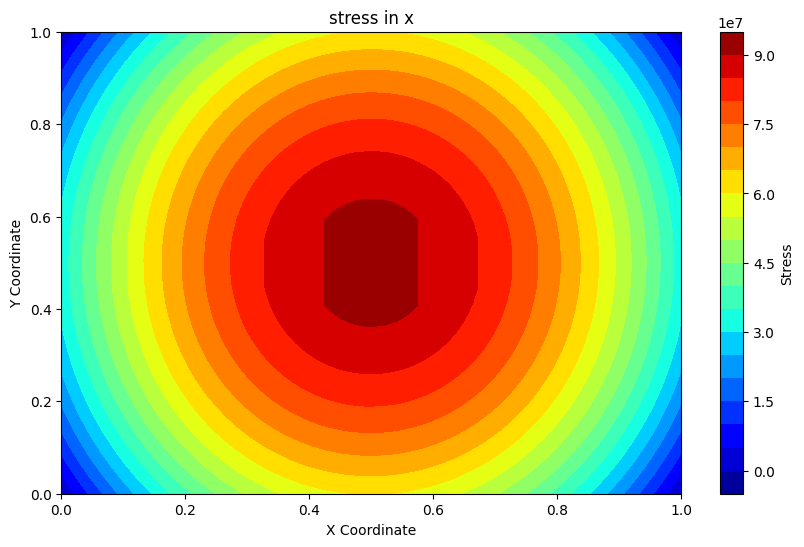

In [128]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['stress_x'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("stress in x")

plt.show()

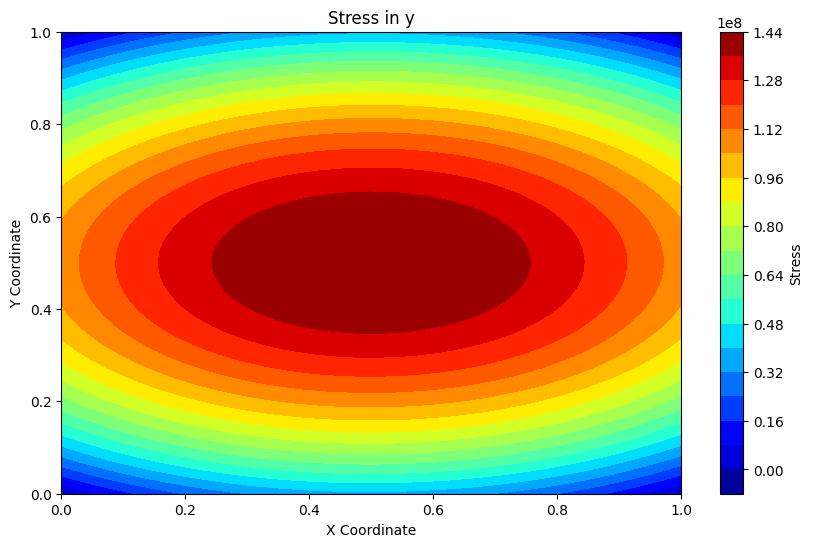

In [129]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['stress_y'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Stress in y")

plt.show()

In [130]:
Txy=(l[1])*(diff(ux,y)+diff(uy,x))
T_xy=lambdify((x,y),Txy)
data['Txy'] = np.vectorize(T_xy)(data['x'], data['y'])
data.head()

,x,y,u_x,u_y,stress_x,stress_y,e_x,e_y,Txy
0,0.000000,1.000000,0.000000,0.000100,-3.995971e+05,-6.625074e+05,-3.719275e-07,-1.006722e-06,1.578735e+07
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.515174e+07
2,1.000000,0.000000,0.000050,0.000000,-4.256764e+05,-7.883456e+05,-3.500911e-07,-1.225753e-06,1.554825e+07
3,1.000000,1.000000,0.000050,0.000100,7.596179e+03,1.566202e+05,-7.332928e-08,2.864880e-07,-1.532385e+07
4,0.699605,0.506279,0.000042,0.000053,8.283847e+07,1.399907e+08,7.562331e-05,2.136170e-04,-1.073436e+05


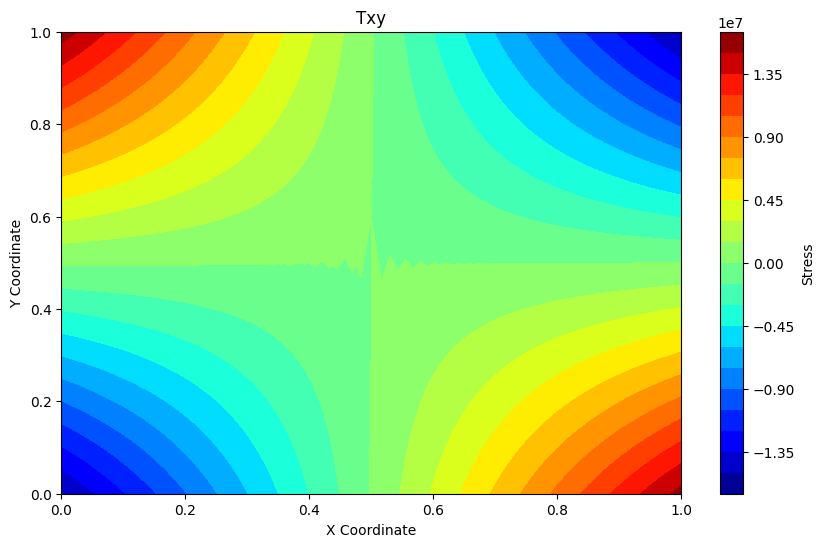

In [131]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['Txy'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Txy")

plt.show()